# MLNN Final

## Balance dataset

#### Installation

In [1]:
#!pip install langdetect
#!pip install tqdm

Data source: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews


#### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from langdetect import detect
from tqdm.notebook import trange, tqdm

#plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-v0_8')

# pandas with progress bar
tqdm.pandas()

In [3]:
df = pd.read_csv('Reviews.csv')
print(df.dtypes)
df.shape

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object


(568454, 10)

#### We need only the relevant columns for our task


In [4]:
df = df[['Text', 'Score']]
print(df.dtypes)
df.shape

Text     object
Score     int64
dtype: object


(568454, 2)

#### Drop rows with non-English texts

In [5]:
# drop non-english rows

def markNonEnglish(x):
    try:
        if detect(x) == 'en':
            return x
        else:
            return np.nan
    except:
        # not text but emoji etc.
        return np.nan
        
df['Text'] = df['Text'].progress_apply(markNonEnglish)

df.dropna(inplace=True)
df.shape


  0%|          | 0/568454 [00:00<?, ?it/s]

(568151, 2)

In [6]:
'''
# drop non-english rows
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        # check if it is non english
        if detect(row['Text']) != 'en':
                # non english
                df.at[i, 'Text'] = np.nan
    except:
        # is not text but emoji etc.
        balanced.at[i, 'Text'] = np.nan


df.dropna(inplace=True)
df.shape
'''

"\n# drop non-english rows\nfor i, row in tqdm(df.iterrows(), total=len(df)):\n    try:\n        # check if it is non english\n        if detect(row['Text']) != 'en':\n                # non english\n                df.at[i, 'Text'] = np.nan\n    except:\n        # is not text but emoji etc.\n        balanced.at[i, 'Text'] = np.nan\n\n\ndf.dropna(inplace=True)\ndf.shape\n"

In [7]:
df.groupby('Score').count()

,Text
Score,
1,52245
2,29755
3,42628
4,80625
5,362898


#### Reduce file size by reducing the 5 star ratings to the maximum of 150k

In [8]:
# reduce the file size
def sampling_k_elements(group, k=150000):
    if len(group) < k:
        return group
    return group.sample(k)

df = df.groupby('Score').apply(sampling_k_elements).reset_index(drop=True)
df.shape


(355253, 2)

In [9]:
df.groupby('Score').count()

,Text
Score,
1,52245
2,29755
3,42628
4,80625
5,150000


#### Check rows for empty strings and drop them if found

In [10]:
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)
df.shape

(355253, 2)

#### Data Distribution

We assume that reviews with greater than 3 starts are positive reviews and those with less than 3 starts are negative reviews. We consider 3 star reviews to be neutral reviews.
Let's label the data accordingly to help us see the data distribution.

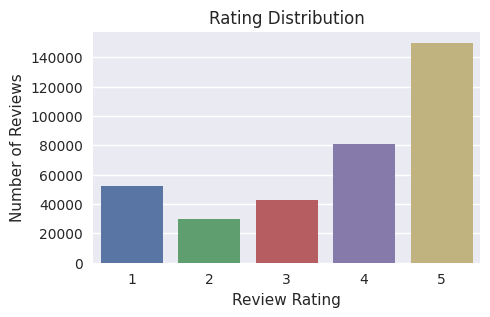

In [11]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='Score', data=df)
ax.set(xlabel='Review Rating', ylabel='Number of Reviews', title='Rating Distribution')
plt.show()

#### We have a biased dataset in favour of positive ratings. Let's balance the data

In [12]:
# balance data
# credit: https://stackoverflow.com/questions/45839316/pandas-balancing-data

'''
maxlen = int(df.groupby('Score').count().min())

def sampling_k_elements(group, k=maxlen):
    if len(group) < k:
        return group
    return group.sample(k)

balanced = df.groupby('Score').apply(sampling_k_elements).reset_index(drop=True)
balanced.shape
'''

"\nmaxlen = int(df.groupby('Score').count().min())\n\ndef sampling_k_elements(group, k=maxlen):\n    if len(group) < k:\n        return group\n    return group.sample(k)\n\nbalanced = df.groupby('Score').apply(sampling_k_elements).reset_index(drop=True)\nbalanced.shape\n"

#### Data Distribution after balancing the data set

In [13]:
'''
plt.figure(figsize=(5,3))
ax = sns.countplot(x='Score', data=balanced)
ax.set(xlabel='Review Rating', ylabel='Number of Reviews', title='Rating Distribution')
plt.show()
'''

"\nplt.figure(figsize=(5,3))\nax = sns.countplot(x='Score', data=balanced)\nax.set(xlabel='Review Rating', ylabel='Number of Reviews', title='Rating Distribution')\nplt.show()\n"

#### Save the resized dataset to file

In [14]:
df.to_csv('Reviews-Resized.csv', index=False)